# Case Study: Vehicle Advertisements Analysis


Section 1: Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ranu1\Downloads\vehicles.csv')
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)

In [3]:
df.head(3)

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...


In [4]:
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

## Dropping the columns that can't be imputed 

In [5]:
df.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [6]:
df = df.drop(['ad_title', 'ad_description', 'details','slug','title'],axis=1)

In [7]:
df.isnull().sum()

type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(strategy = 'most_frequent')
df[['member_since']] = imp1.fit_transform(df[['member_since']])
df[['is_member']] = imp1.fit_transform(df[['is_member']])
df[['is_authorized_dealer']] = imp1.fit_transform(df[['is_authorized_dealer']])
df[['is_featured_member']] = imp1.fit_transform(df[['is_featured_member']])

In [9]:
df.isnull().sum()

type                       0
price                   3811
timestamp                  6
posted_date                6
deactivation_date          6
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member                  0
is_authorized_dealer       0
is_featured_member         0
is_verified                0
membership_level           0
member_since               0
properties                 0
user                       0
dtype: int64

In [10]:
df.dropna(subset=['timestamp','posted_date','deactivation_date'], inplace = True)

In [11]:
df.isnull().sum()

type                       0
price                   3811
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member                  0
is_authorized_dealer       0
is_featured_member         0
is_verified                0
membership_level           0
member_since               0
properties                 0
user                       0
dtype: int64

In [12]:
df['price'] = df['price'].astype(str)
df = df[df['price']!='Negotiable']
df['price'] = df['price'].apply(lambda x: x.replace('Rs ',''))
df['price'] = df['price'].apply(lambda x:x.replace(',',''))
df['price'] = pd.to_numeric(df['price'],errors='coerce')  

In [13]:
from sklearn.impute import SimpleImputer
imp2 = SimpleImputer(strategy = 'median')
df[['price']] = imp1.fit_transform(df[['price']])

In [14]:
df.isnull().sum()

type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
member_since            0
properties              0
user                    0
dtype: int64

In [15]:
dict_df = df['properties'].apply(pd.Series)

In [16]:
import ast 
dict_df.iloc[0][0]    #check whether first row and column is fetching or not
dict_converted = ast.literal_eval(dict_df.iloc[0][0])   # converting python literal(dict,tuple) into python object
print(dict_converted)

{'Condition': 'Reconditioned', 'Part or Accessory Type': 'Electrical Components'}


In [17]:
dict_df.iloc[28273][0]

"{'Brand': 'Suzuki', 'Model': 'Wagon R FX', 'Trim / Edition': 'Safety', 'Year of Manufacture': '2017', 'Condition': 'Used', 'Transmission': 'Automatic', 'Fuel type': 'Petrol', 'Engine capacity': '660 cc', 'Mileage': '36,000 km'}"

In [18]:
# dict_df = df['properties'].apply(pd.Series)
# Brand = []
# Model = []
# for i in range(dict_df.shape[0]):
#     dict_converted = ast.literal_eval(dict_df.iloc[i][0])
#     if 'Brand' not in dict_converted:
#         Brand.append(np.nan)
#     else:
#         Brand.append(dict_converted['Brand'])
#     if 'Model' not in dict_converted:
#         Model.append(np.nan)
#     else:
#         Model.append(dict_converted['Model'])
# df['Brand'] = Brand
# df['Model'] = Model

In [19]:
Condition = []
Mileage = []
Engine_capacity = []
Fuel_type = []
Brand = []
Model = []
for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])
    if 'Brand' not in dict_converted:
        Brand.append(np.nan)
    else:
        Brand.append(dict_converted['Brand'])
    if 'Model' not in dict_converted:
        Model.append(np.nan)
    else:
        Model.append(dict_converted['Model'])
    if 'Condition' not in dict_converted:
        Condition.append(np.nan)
    else:
        Condition.append(dict_converted['Condition'])

    if 'Fuel type' not in dict_converted:
        Fuel_type.append(np.nan)
    else:
        Fuel_type.append(dict_converted['Fuel type'])

    if 'Mileage' not in dict_converted:
        Mileage.append(np.nan)
    else:
        Mileage.append(dict_converted['Mileage'])

    if 'Engine capacity' not in dict_converted:
        Engine_capacity.append(np.nan)
    else:
        Engine_capacity.append(dict_converted['Engine capacity'])

df['Condition'] = Condition
df['Mileage'] = Mileage
df['Engine_capacity'] = Engine_capacity
df['Fuel_type'] = Fuel_type
df['Brand'] = Brand
df['Model'] = Model

In [20]:
df.dtypes

type                     object
price                   float64
timestamp                object
posted_date              object
deactivation_date        object
category                 object
parent_category          object
location                 object
geo_region               object
area                     object
is_delivery_free           bool
is_doorstep_delivery       bool
is_dsd_applicable          bool
is_member                object
is_authorized_dealer     object
is_featured_member       object
is_verified                bool
membership_level         object
member_since             object
properties               object
user                     object
Condition                object
Mileage                  object
Engine_capacity          object
Fuel_type                object
Brand                    object
Model                    object
dtype: object

In [21]:
df.head(5)

,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,...,membership_level,member_since,properties,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...,Reconditioned,NaN,NaN,NaN,NaN,NaN
1,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...,Reconditioned,NaN,NaN,NaN,Other brand,NaN
2,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...,Reconditioned,NaN,NaN,NaN,NaN,NaN
3,for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...,New,NaN,NaN,NaN,NaN,NaN
4,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...,New,NaN,NaN,NaN,NaN,NaN


#### After looking at the data we need to start transforming price into int data type,remove RS and remove ','

#### Finally converting to int

In [22]:
#df['price'] = df['price'].astype(str)
#df = df[df['price']!='Negotiable']
#df['price'] = df['price'].apply(lambda x: x.replace('Rs ',''))
#df['price'] = df['price'].apply(lambda x:x.replace(',',''))
#df['price'] = pd.to_numeric(df['price'],errors='coerce')

In [23]:
df['Mileage'] = df['Mileage'].astype(str)
df['Mileage'] = df['Mileage'].apply(lambda x:x.replace(' km',''))
df['Mileage'] = df['Mileage'].apply(lambda x:x.replace(',',''))
df['Mileage'] = pd.to_numeric(df['Mileage'],errors='coerce')

In [24]:
df['Engine_capacity'] = df['Engine_capacity'].astype(str)
df['Engine_capacity'] = df['Engine_capacity'].apply(lambda x: x.replace(' cc',''))
df['Engine_capacity'] = df['Engine_capacity'].apply(lambda x: x.replace(',',''))
df['Engine_capacity'] = pd.to_numeric(df['Engine_capacity'],errors='coerce')

In [25]:
df['Mileage'] = df['Mileage'].astype(float)
df['Engine_capacity'] = df['Engine_capacity'].astype(float)

#### Now moving onto columns where there exists categorical data of members, dealers and featured members 

#### Looking at the data we see that the True/False values need to be encoded and then imputed wherever there's null values

#### Now moving to encode all categorical data

In [26]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [27]:
df.head()

,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,...,membership_level,member_since,properties,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...,Reconditioned,NaN,NaN,NaN,NaN,NaN
1,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...,Reconditioned,NaN,NaN,NaN,Other brand,NaN
2,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...,Reconditioned,NaN,NaN,NaN,NaN,NaN
3,for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...,New,NaN,NaN,NaN,NaN,NaN
4,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",...,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...,New,NaN,NaN,NaN,NaN,NaN


In [28]:
from sklearn.preprocessing import LabelEncoder

# Assume df is your DataFrame
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'bool' or df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   type    price  timestamp  posted_date  deactivation_date  category  \
0     0  18000.0      85835       203003               2510         0   
1     0  67000.0      86402       201493               1509         0   
2     0  85000.0       1362        68293               1508         0   
3     0  47000.0      14140        73582               3436         0   
4     0   9000.0      31448        79694               3435         0   

   parent_category  location  geo_region  area  ...  membership_level  \
0                0       127           1     4  ...                 2   
1                0       120           1     4  ...                 1   
2                0       120           1     4  ...                 1   
3                0       119           1     4  ...                 1   
4                0       119           1     4  ...                 1   

   member_since  properties   user  Condition  Mileage  Engine_capacity  \
0            86      134982  52570          1  

In [29]:
df.head(5)

,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,...,membership_level,member_since,properties,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,0,18000.0,85835,203003,2510,0,0,127,1,4,...,2,86,134982,52570,1,NaN,NaN,6,142,937
1,0,67000.0,86402,201493,1509,0,0,120,1,4,...,1,47,135066,29644,1,NaN,NaN,6,96,937
2,0,85000.0,1362,68293,1508,0,0,120,1,4,...,1,47,135074,29644,1,NaN,NaN,6,142,937
3,0,47000.0,14140,73582,3436,0,0,119,1,4,...,1,23,134503,31390,0,NaN,NaN,6,142,937
4,0,9000.0,31448,79694,3435,0,0,119,1,4,...,1,23,134503,31390,0,NaN,NaN,6,142,937


In [30]:
df.isnull().sum()

type                         0
price                        0
timestamp                    0
posted_date                  0
deactivation_date            0
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                    0
is_authorized_dealer         0
is_featured_member           0
is_verified                  0
membership_level             0
member_since                 0
properties                   0
user                         0
Condition                    0
Mileage                 101721
Engine_capacity         101721
Fuel_type                    0
Brand                        0
Model                        0
dtype: int64

In [31]:
df.dtypes

type                      int32
price                   float64
timestamp                 int32
posted_date               int32
deactivation_date         int32
category                  int32
parent_category           int32
location                  int32
geo_region                int32
area                      int32
is_delivery_free          int64
is_doorstep_delivery      int64
is_dsd_applicable         int64
is_member                 int32
is_authorized_dealer      int32
is_featured_member        int32
is_verified               int64
membership_level          int32
member_since              int32
properties                int32
user                      int32
Condition                 int32
Mileage                 float64
Engine_capacity         float64
Fuel_type                 int32
Brand                     int32
Model                     int32
dtype: object

#### Finally dropping properties and types column

In [32]:
df = df.drop(['type','properties'],axis=1)     #type has all same values that's why we dropped it,properties-we made another columns of that values

In [33]:
df.dtypes

price                   float64
timestamp                 int32
posted_date               int32
deactivation_date         int32
category                  int32
parent_category           int32
location                  int32
geo_region                int32
area                      int32
is_delivery_free          int64
is_doorstep_delivery      int64
is_dsd_applicable         int64
is_member                 int32
is_authorized_dealer      int32
is_featured_member        int32
is_verified               int64
membership_level          int32
member_since              int32
user                      int32
Condition                 int32
Mileage                 float64
Engine_capacity         float64
Fuel_type                 int32
Brand                     int32
Model                     int32
dtype: object

In [34]:
# df= df.drop(['is_featured_member'],axis=1) unique values are there in category that'swhy we haven't deleted
# df = df.drop(['is_authorized_dealer'],axis=1)

In [35]:
df.head()

,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,...,is_verified,membership_level,member_since,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,18000.0,85835,203003,2510,0,0,127,1,4,0,...,1,2,86,52570,1,NaN,NaN,6,142,937
1,67000.0,86402,201493,1509,0,0,120,1,4,0,...,1,1,47,29644,1,NaN,NaN,6,96,937
2,85000.0,1362,68293,1508,0,0,120,1,4,0,...,1,1,47,29644,1,NaN,NaN,6,142,937
3,47000.0,14140,73582,3436,0,0,119,1,4,0,...,0,1,23,31390,0,NaN,NaN,6,142,937
4,9000.0,31448,79694,3435,0,0,119,1,4,0,...,0,1,23,31390,0,NaN,NaN,6,142,937


In [36]:
# df['category'].unique()

In [37]:
# df.shape

In [38]:
df.columns


Index(['price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'user', 'Condition', 'Mileage',
       'Engine_capacity', 'Fuel_type', 'Brand', 'Model'],
      dtype='object')

In [39]:
df.head()

,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,...,is_verified,membership_level,member_since,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,18000.0,85835,203003,2510,0,0,127,1,4,0,...,1,2,86,52570,1,NaN,NaN,6,142,937
1,67000.0,86402,201493,1509,0,0,120,1,4,0,...,1,1,47,29644,1,NaN,NaN,6,96,937
2,85000.0,1362,68293,1508,0,0,120,1,4,0,...,1,1,47,29644,1,NaN,NaN,6,142,937
3,47000.0,14140,73582,3436,0,0,119,1,4,0,...,0,1,23,31390,0,NaN,NaN,6,142,937
4,9000.0,31448,79694,3435,0,0,119,1,4,0,...,0,1,23,31390,0,NaN,NaN,6,142,937


Text(0.5, 1.0, 'Correlation\xa0Heatmap')

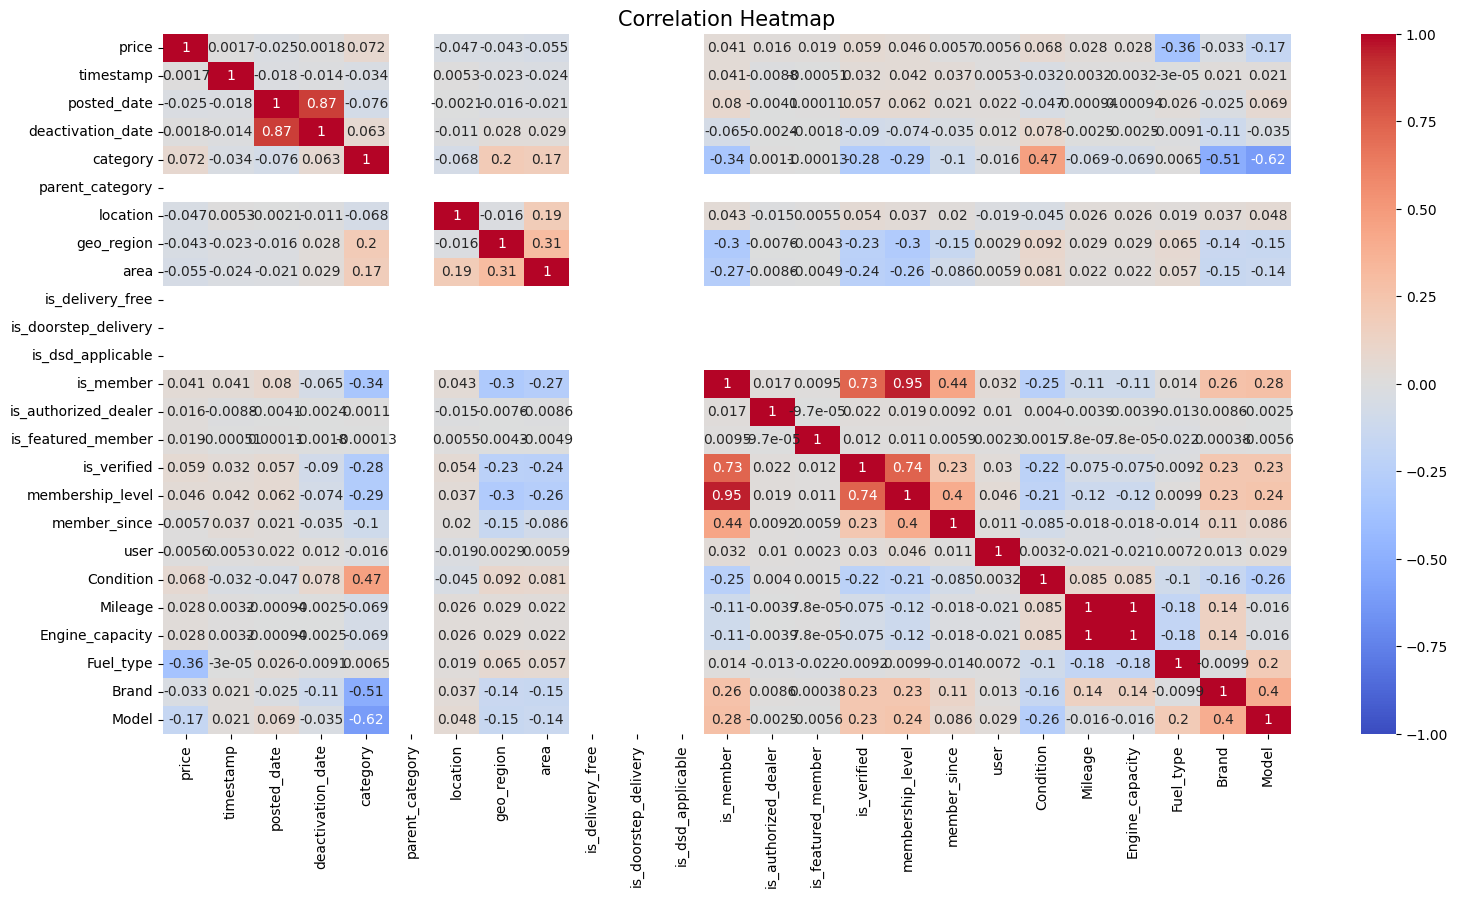

In [41]:
# 2. Correlation Heatmap
plt.figure(figsize=(40,20))
plt.subplot(2, 2, 2)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=15)

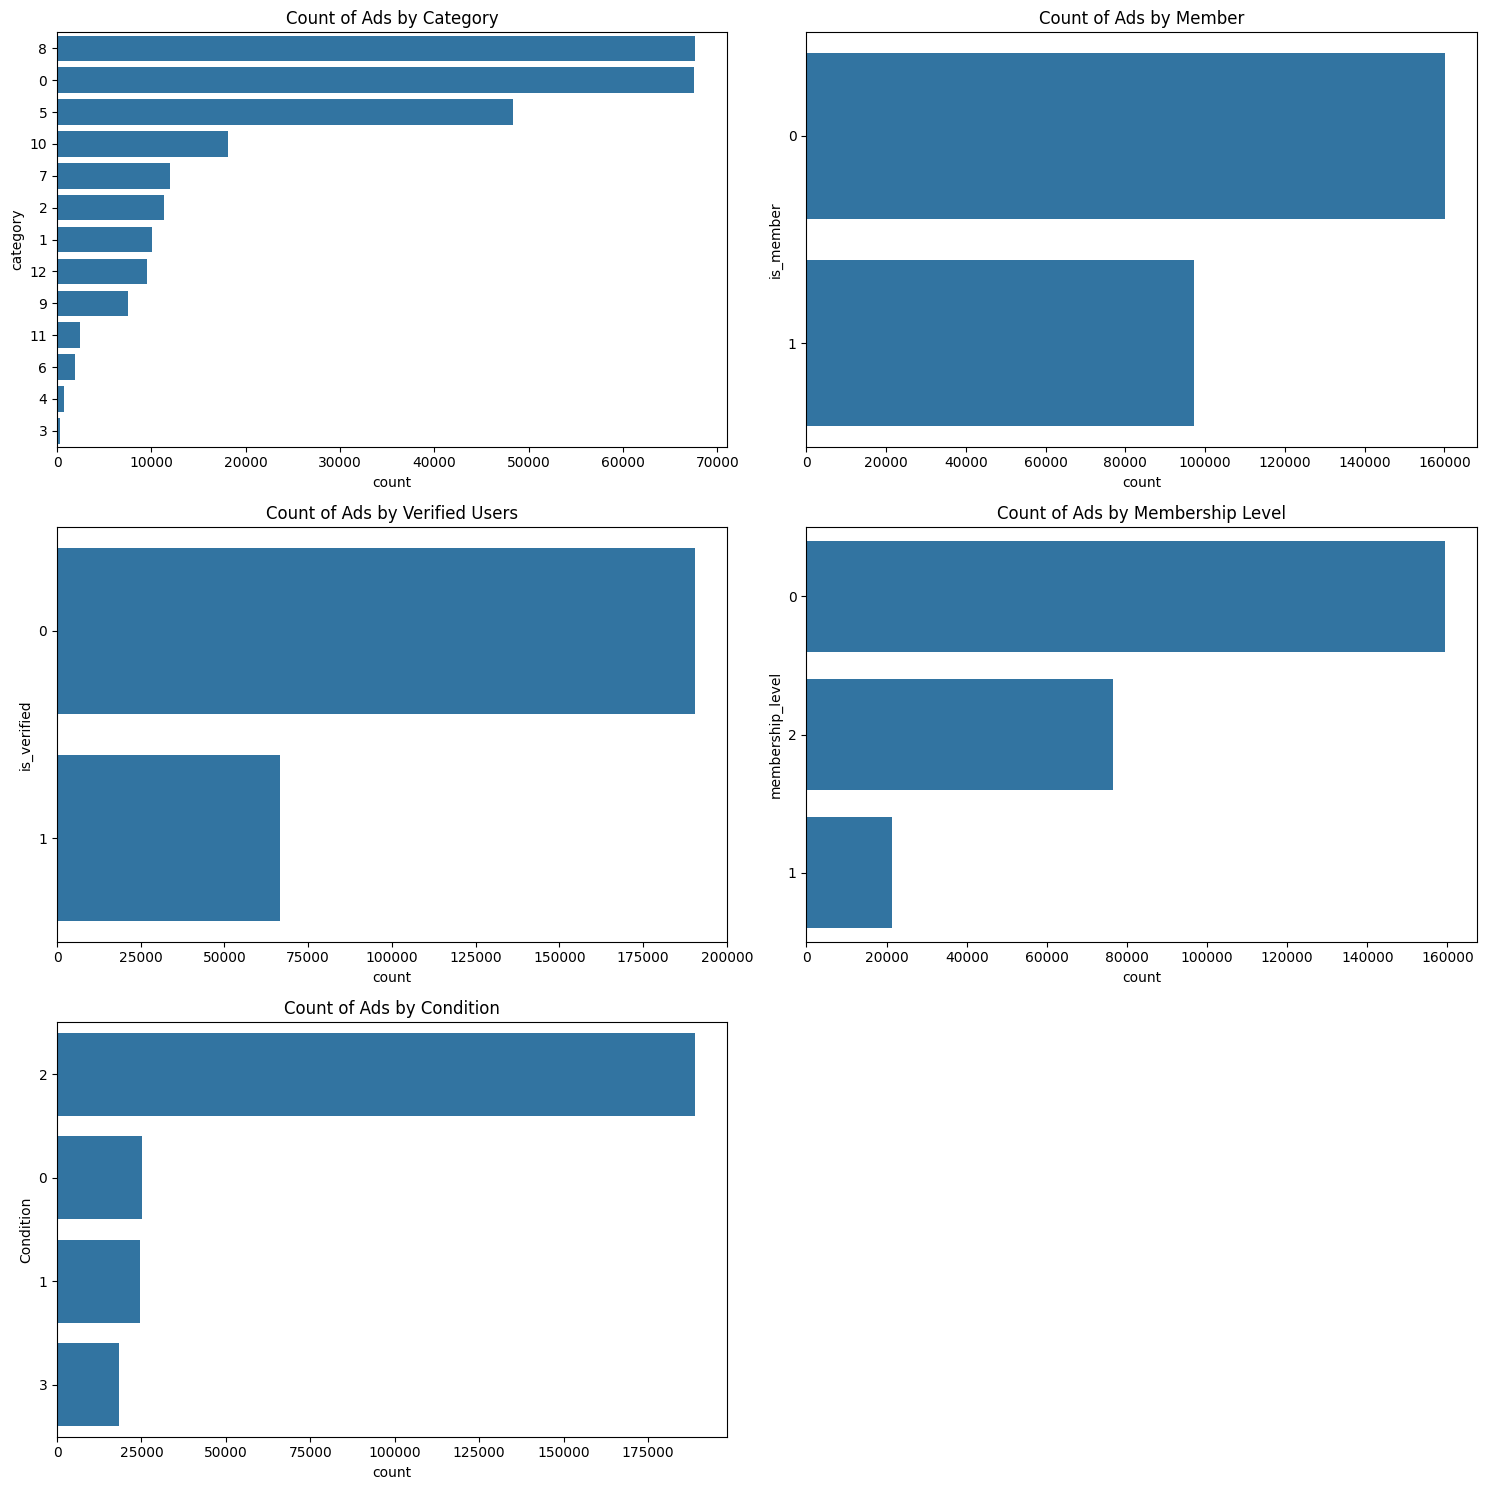

In [42]:
# 3. Count Plots for Categorical Variables
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Count of Ads by Category')

plt.subplot(3, 2, 2)
sns.countplot(y='is_member', data=df, order=df['is_member'].value_counts().index)
plt.title('Count of Ads by Member')

plt.subplot(3, 2, 3)
sns.countplot(y='is_verified', data=df, order=df['is_verified'].value_counts().index)
plt.title('Count of Ads by Verified Users')

plt.subplot(3, 2, 4)
sns.countplot(y='membership_level', data=df, order=df['membership_level'].value_counts().index)
plt.title('Count of Ads by Membership Level')

plt.subplot(3, 2, 5)
sns.countplot(y='Condition', data=df, order=df['Condition'].value_counts().index)
plt.title('Count of Ads by Condition')

plt.tight_layout()
plt.show()

In [43]:
df.tail()

,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,...,is_verified,membership_level,member_since,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
258883,1030000.0,59,249725,252238,5,0,93,8,8,0,...,0,0,15,22935,2,140000.0,140000.0,5,92,553
258884,3550000.0,109903,249643,252161,5,0,21,1,4,0,...,0,0,15,63632,2,219000.0,219000.0,5,128,115
258885,70000.0,59,249724,252236,9,0,40,1,4,0,...,0,0,15,63011,3,NaN,NaN,6,142,937
258886,7250000.0,57,249723,252237,5,0,28,1,4,0,...,0,2,18,39259,2,30000.0,30000.0,5,128,694
258887,135000.0,57,249722,252234,8,0,110,17,1,0,...,0,0,15,11652,2,88102.0,88102.0,6,124,771


In [44]:
df['Mileage'].isnull().sum()

101721

In [45]:
(df['Mileage']=='NaN').shape

(257209,)

In [46]:
mile_med = df['Mileage'].median()

In [47]:
df['Mileage'].replace(np.nan,mile_med,inplace=True)

C:\Users\ranu1\AppData\Local\Temp\ipykernel_10892\1974169234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].replace(np.nan,mile_med,inplace=True)


In [48]:
median_engcap = df['Engine_capacity'].median()
df['Engine_capacity'].replace(np.nan,median_engcap,inplace=True)

C:\Users\ranu1\AppData\Local\Temp\ipykernel_10892\3135958008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine_capacity'].replace(np.nan,median_engcap,inplace=True)


In [49]:
df.head()

,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,...,is_verified,membership_level,member_since,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,18000.0,85835,203003,2510,0,0,127,1,4,0,...,1,2,86,52570,1,56000.0,56000.0,6,142,937
1,67000.0,86402,201493,1509,0,0,120,1,4,0,...,1,1,47,29644,1,56000.0,56000.0,6,96,937
2,85000.0,1362,68293,1508,0,0,120,1,4,0,...,1,1,47,29644,1,56000.0,56000.0,6,142,937
3,47000.0,14140,73582,3436,0,0,119,1,4,0,...,0,1,23,31390,0,56000.0,56000.0,6,142,937
4,9000.0,31448,79694,3435,0,0,119,1,4,0,...,0,1,23,31390,0,56000.0,56000.0,6,142,937


In [50]:
df.isnull().sum()

price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
member_since            0
user                    0
Condition               0
Mileage                 0
Engine_capacity         0
Fuel_type               0
Brand                   0
Model                   0
dtype: int64

In [51]:
df.head()

,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,...,is_verified,membership_level,member_since,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,18000.0,85835,203003,2510,0,0,127,1,4,0,...,1,2,86,52570,1,56000.0,56000.0,6,142,937
1,67000.0,86402,201493,1509,0,0,120,1,4,0,...,1,1,47,29644,1,56000.0,56000.0,6,96,937
2,85000.0,1362,68293,1508,0,0,120,1,4,0,...,1,1,47,29644,1,56000.0,56000.0,6,142,937
3,47000.0,14140,73582,3436,0,0,119,1,4,0,...,0,1,23,31390,0,56000.0,56000.0,6,142,937
4,9000.0,31448,79694,3435,0,0,119,1,4,0,...,0,1,23,31390,0,56000.0,56000.0,6,142,937


In [52]:
# # Define ColumnTransformer
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('brand_n', OneHotEncoder(), ['Brand']),
#         ('model_n', OneHotEncoder(), ['Model'])
#     ],
#     remainder='passthrough'  # To keep the remaining columns
# )

In [53]:
# df1 = column_transformer.fit_transform(df)

In [54]:
# ecols = ct.get_feature_names_out()
# df = pd.DataFrame(df1,columns = ecols)

In [55]:
# df.head()

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
df.head()

,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,...,is_verified,membership_level,member_since,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,18000.0,85835,203003,2510,0,0,127,1,4,0,...,1,2,86,52570,1,56000.0,56000.0,6,142,937
1,67000.0,86402,201493,1509,0,0,120,1,4,0,...,1,1,47,29644,1,56000.0,56000.0,6,96,937
2,85000.0,1362,68293,1508,0,0,120,1,4,0,...,1,1,47,29644,1,56000.0,56000.0,6,142,937
3,47000.0,14140,73582,3436,0,0,119,1,4,0,...,0,1,23,31390,0,56000.0,56000.0,6,142,937
4,9000.0,31448,79694,3435,0,0,119,1,4,0,...,0,1,23,31390,0,56000.0,56000.0,6,142,937


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:,1:] = sc.fit_transform(df.iloc[:,1:])

C:\Users\ranu1\AppData\Local\Temp\ipykernel_10892\3697595479.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.93544796  0.95281559 -1.65202203 ... -1.69193388 -1.69199514
 -1.69199514]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = sc.fit_transform(df.iloc[:,1:])
C:\Users\ranu1\AppData\Local\Temp\ipykernel_10892\3697595479.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.06459627  1.04375727 -0.79449123 ...  1.70937711  1.70936331
  1.70934951]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = sc.fit_transform(df.iloc[:,1:])
C:\Users\ranu1\AppData\Local\Temp\ipykernel_10892\3697595479.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.6995521

In [59]:
df.head()

,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,...,is_verified,membership_level,member_since,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,18000.0,0.935448,1.064596,-1.699552,-1.330045,0,0.394417,-0.579217,-0.658236,0,...,1.690853,1.465897,2.736605,0.508701,-1.090201,-0.245042,-0.245042,0.359849,1.020393,0.987779
1,67000.0,0.952816,1.043757,-1.713237,-1.330045,0,0.264565,-0.579217,-0.658236,0,...,1.690853,0.356908,0.976907,-0.493027,-1.090201,-0.245042,-0.245042,0.359849,0.089059,0.987779
2,85000.0,-1.652022,-0.794491,-1.713251,-1.330045,0,0.264565,-0.579217,-0.658236,0,...,1.690853,0.356908,0.976907,-0.493027,-1.090201,-0.245042,-0.245042,0.359849,1.020393,0.987779
3,47000.0,-1.260623,-0.721500,-1.686893,-1.330045,0,0.246015,-0.579217,-0.658236,0,...,-0.591417,0.356908,-0.105984,-0.416737,-2.487810,-0.245042,-0.245042,0.359849,1.020393,0.987779
4,9000.0,-0.730466,-0.637150,-1.686906,-1.330045,0,0.246015,-0.579217,-0.658236,0,...,-0.591417,0.356908,-0.105984,-0.416737,-2.487810,-0.245042,-0.245042,0.359849,1.020393,0.987779


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [61]:
df.head()

,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,...,is_verified,membership_level,member_since,user,Condition,Mileage,Engine_capacity,Fuel_type,Brand,Model
0,18000.0,0.935448,1.064596,-1.699552,-1.330045,0,0.394417,-0.579217,-0.658236,0,...,1.690853,1.465897,2.736605,0.508701,-1.090201,-0.245042,-0.245042,0.359849,1.020393,0.987779
1,67000.0,0.952816,1.043757,-1.713237,-1.330045,0,0.264565,-0.579217,-0.658236,0,...,1.690853,0.356908,0.976907,-0.493027,-1.090201,-0.245042,-0.245042,0.359849,0.089059,0.987779
2,85000.0,-1.652022,-0.794491,-1.713251,-1.330045,0,0.264565,-0.579217,-0.658236,0,...,1.690853,0.356908,0.976907,-0.493027,-1.090201,-0.245042,-0.245042,0.359849,1.020393,0.987779
3,47000.0,-1.260623,-0.721500,-1.686893,-1.330045,0,0.246015,-0.579217,-0.658236,0,...,-0.591417,0.356908,-0.105984,-0.416737,-2.487810,-0.245042,-0.245042,0.359849,1.020393,0.987779
4,9000.0,-0.730466,-0.637150,-1.686906,-1.330045,0,0.246015,-0.579217,-0.658236,0,...,-0.591417,0.356908,-0.105984,-0.416737,-2.487810,-0.245042,-0.245042,0.359849,1.020393,0.987779


In [62]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=8)

# Model 1

In [63]:
las = Lasso()
las.fit(x_train,y_train)

Lasso()

In [64]:
y_pred1 = las.predict(x_test)

In [65]:
las.coef_     #giving the coefficients of all the columns

array([ 1.71712890e+04, -4.23747135e+05,  3.74446167e+05,  2.89734835e+05,
        0.00000000e+00, -2.41376966e+05, -9.40647879e+04, -1.57020980e+05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.34204527e+05,
        5.91284646e+04,  6.30039081e+04,  4.13395893e+05, -1.47381470e+05,
       -1.75056734e+05,  6.04985752e+04,  7.13524026e+04, -1.25349240e+05,
       -3.37848369e-09, -2.48131556e+06,  3.11442380e+03, -7.27369008e+05])

In [66]:
las.intercept_

2045780.5204314918

In [67]:
cols = df.drop('price',axis=1).columns

In [68]:
naq = pd.Series(las.coef_,index=cols)

<Axes: >

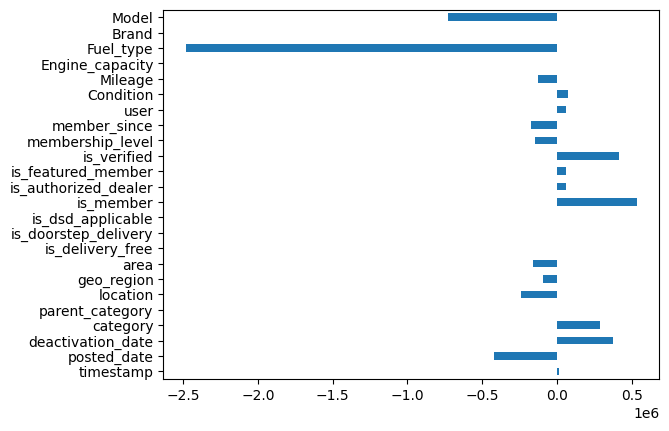

In [69]:
naq.plot(kind='barh')

In [70]:
metrics.mean_squared_error(y_test,y_pred1)

25142343880090.35

In [71]:
metrics.mean_absolute_error(y_test,y_pred1)

1969895.26968333

In [72]:
metrics.r2_score(y_test,y_pred1)

0.23709083659037633

In [73]:
naq

timestamp               1.717129e+04
posted_date            -4.237471e+05
deactivation_date       3.744462e+05
category                2.897348e+05
parent_category         0.000000e+00
location               -2.413770e+05
geo_region             -9.406479e+04
area                   -1.570210e+05
is_delivery_free        0.000000e+00
is_doorstep_delivery    0.000000e+00
is_dsd_applicable       0.000000e+00
is_member               5.342045e+05
is_authorized_dealer    5.912846e+04
is_featured_member      6.300391e+04
is_verified             4.133959e+05
membership_level       -1.473815e+05
member_since           -1.750567e+05
user                    6.049858e+04
Condition               7.135240e+04
Mileage                -1.253492e+05
Engine_capacity        -3.378484e-09
Fuel_type              -2.481316e+06
Brand                   3.114424e+03
Model                  -7.273690e+05
dtype: float64

In [74]:
coeffs = naq.abs().sort_values(ascending=False)

In [75]:
coeffs

Fuel_type               2.481316e+06
Model                   7.273690e+05
is_member               5.342045e+05
posted_date             4.237471e+05
is_verified             4.133959e+05
deactivation_date       3.744462e+05
category                2.897348e+05
location                2.413770e+05
member_since            1.750567e+05
area                    1.570210e+05
membership_level        1.473815e+05
Mileage                 1.253492e+05
geo_region              9.406479e+04
Condition               7.135240e+04
is_featured_member      6.300391e+04
user                    6.049858e+04
is_authorized_dealer    5.912846e+04
timestamp               1.717129e+04
Brand                   3.114424e+03
Engine_capacity         3.378484e-09
is_dsd_applicable       0.000000e+00
is_doorstep_delivery    0.000000e+00
is_delivery_free        0.000000e+00
parent_category         0.000000e+00
dtype: float64

In [76]:
selected_features = coeffs.iloc[:16].index.tolist()
selected_features

['Fuel_type',
 'Model',
 'is_member',
 'posted_date',
 'is_verified',
 'deactivation_date',
 'category',
 'location',
 'member_since',
 'area',
 'membership_level',
 'Mileage',
 'geo_region',
 'Condition',
 'is_featured_member',
 'user']

## Now creating a new DF from the selected features to train our model

In [77]:
df1 = df[['Fuel_type',
 'Model',
 'is_member',
 'posted_date',
 'is_verified',
 'deactivation_date',
 'category',
 'location',
 'member_since',
 'area',
 'membership_level',
 'Mileage',
 'geo_region',
 'Condition',
 'is_featured_member',
 'user','price']]

In [78]:
df1.head()

,Fuel_type,Model,is_member,posted_date,is_verified,deactivation_date,category,location,member_since,area,membership_level,Mileage,geo_region,Condition,is_featured_member,user,price
0,0.359849,0.987779,1.283652,1.064596,1.690853,-1.699552,-1.330045,0.394417,2.736605,-0.658236,1.465897,-0.245042,-0.579217,-1.090201,-0.007378,0.508701,18000.0
1,0.359849,0.987779,1.283652,1.043757,1.690853,-1.713237,-1.330045,0.264565,0.976907,-0.658236,0.356908,-0.245042,-0.579217,-1.090201,-0.007378,-0.493027,67000.0
2,0.359849,0.987779,1.283652,-0.794491,1.690853,-1.713251,-1.330045,0.264565,0.976907,-0.658236,0.356908,-0.245042,-0.579217,-1.090201,-0.007378,-0.493027,85000.0
3,0.359849,0.987779,1.283652,-0.721500,-0.591417,-1.686893,-1.330045,0.246015,-0.105984,-0.658236,0.356908,-0.245042,-0.579217,-2.487810,-0.007378,-0.416737,47000.0
4,0.359849,0.987779,1.283652,-0.637150,-0.591417,-1.686906,-1.330045,0.246015,-0.105984,-0.658236,0.356908,-0.245042,-0.579217,-2.487810,-0.007378,-0.416737,9000.0


In [79]:
x_train,x_test,y_train,y_test = train_test_split(df1.drop('price',axis=1),df1['price'],test_size=0.2,random_state=42)

# Linear Regression

In [80]:
li = LinearRegression()
model = li.fit(x_train,y_train)

In [81]:
y_pred = model.predict(x_test)

In [82]:
metrics.mean_squared_error(y_test,y_pred)

22703291459770.78

In [83]:
metrics.r2_score(y_test,y_pred)

0.2544070912895874

In [84]:
metrics.mean_absolute_error(y_test,y_pred)

1949870.7680063683

# OLS 

In [85]:
model = sm.OLS(y_train,x_train).fit()

In [86]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.129
Method:                 Least Squares   F-statistic:                              1903.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:53:40   Log-Likelihood:                     -3.5465e+06
No. Observations:              205767   AIC:                                  7.093e+06
Df Residuals:                  205751   BIC:                                  7.093e+06
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [87]:
y_pred = model.predict(x_test)

In [88]:
metrics.mean_squared_error(y_test,y_pred)

26816807857552.51

In [89]:
metrics.r2_score(y_test,y_pred)

0.1193161657519991

In [90]:
metrics.mean_absolute_error(y_test,y_pred)

2485862.383170345

## OLS performs worse than Linear Regression

### Hyper Parameter Tuning choosing only the appropriate columns

In [ ]:
#parameters={'alpha' : [1,5,10,20,35,45,50,55,60,75,80,95,100]}
#lass = GridSearchCV(las,parameters,scoring='neg_mean_squared_error', cv=5)
#lass.fit(x_train,y_train)

In [126]:
#lass.best_params_

{'alpha': 10}

# Using Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [92]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, max_features='sqrt', random_state=42)

In [93]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [95]:
y_pred = rf.predict(x_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 6372201836380.593


In [96]:
r2 = metrics.r2_score(y_test, y_pred)
print("R-squared (R²) score:", r2)

R-squared (R²) score: 0.7907321715665978


In [97]:
#Section 2: User Segmentation

In [98]:
df1 = pd.read_csv(r"C:\Users\ranu1\Downloads\vehicles.csv")

In [99]:
df1.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [100]:
df1.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [101]:
df1.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [102]:
df1 = df1.drop(['ad_title', 'ad_description', 'details', 'slug', 'title','properties'],axis=1)

In [103]:
df1.isnull().sum()

type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
user                         0
dtype: int64

In [104]:
df1.dropna(subset=['timestamp','posted_date','deactivation_date'], inplace = True)

In [105]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [106]:
df1[['is_member']] = imputer.fit_transform(df1[['is_member']])
df1[['is_authorized_dealer']] = imputer.fit_transform(df1[['is_authorized_dealer']])
df1[['is_featured_member']] = imputer.fit_transform(df1[['is_featured_member']])
df1[['member_since']] = imputer.fit_transform(df1[['member_since']])

In [107]:
df1.isnull().sum()

type                       0
price                   3811
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member                  0
is_authorized_dealer       0
is_featured_member         0
is_verified                0
membership_level           0
member_since               0
user                       0
dtype: int64

In [108]:
df1.isnull().sum()

type                       0
price                   3811
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member                  0
is_authorized_dealer       0
is_featured_member         0
is_verified                0
membership_level           0
member_since               0
user                       0
dtype: int64

In [109]:
df1['price'] = df1['price'].astype(str)
df1 = df1[df1['price']!='Negotiable']
df1['price'] = df1['price'].apply(lambda x: x.replace('Rs ',''))
df1['price'] = df1['price'].apply(lambda x:x.replace(',',''))
df1['price'] = pd.to_numeric(df1['price'],errors='coerce')

In [110]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy='median')
imputer1.fit(df1[['price']])

SimpleImputer(strategy='median')

In [111]:
df1[['price']] = imputer1.transform(df1[['price']])

In [112]:
df1.tail()

,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,user
258883,for_sale,1030000.0,01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,Vehicles,Jaffna City,LK-41,"{'id': 1605, 'name': 'Jaffna'}",False,False,False,False,False,False,False,free,December 2016,48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,for_sale,3550000.0,30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,Vehicles,Battaramulla,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,December 2016,c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,for_sale,70000.0,01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,Vehicles,Colombo 3,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,December 2016,c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,for_sale,7250000.0,01 Apr 11:40 am,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,Cars,Vehicles,Boralesgamuwa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,premium,December 2019,7c6477247c19fa63845687656fee40702da46c9d184568...
258887,for_sale,135000.0,01 Apr 11:40 am,2023-04-01T11:40:56+05:30,2023-05-31T06:10:26.000Z,Motorbikes,Vehicles,Kekirawa,LK-71,"{'id': 1452, 'name': 'Anuradhapura'}",False,False,False,False,False,False,False,free,December 2016,250f50f6456508d02d1f94e93cf90bfe5659696d70e5d2...


In [113]:
from sklearn.preprocessing import LabelEncoder

# Assume df is your DataFrame
label_encoder = LabelEncoder()

for column in df1.columns:
    if df1[column].dtype == 'bool' or df1[column].dtype == 'object':
        df1[column] = label_encoder.fit_transform(df1[column])

print(df1.head())


   type    price  timestamp  posted_date  deactivation_date  category  \
0     0  18000.0      85835       203003               2510         0   
1     0  67000.0      86402       201493               1509         0   
2     0  85000.0       1362        68293               1508         0   
3     0  47000.0      14140        73582               3436         0   
4     0   9000.0      31448        79694               3435         0   

   parent_category  location  geo_region  area  is_delivery_free  \
0                0       127           1     4                 0   
1                0       120           1     4                 0   
2                0       120           1     4                 0   
3                0       119           1     4                 0   
4                0       119           1     4                 0   

   is_doorstep_delivery  is_dsd_applicable  is_member  is_authorized_dealer  \
0                     0                  0          1                    

In [114]:
df1.tail()

,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,user
258883,0,1030000.0,59,249725,252238,5,0,93,8,8,0,0,0,0,0,0,0,0,15,22935
258884,0,3550000.0,109903,249643,252161,5,0,21,1,4,0,0,0,0,0,0,0,0,15,63632
258885,0,70000.0,59,249724,252236,9,0,40,1,4,0,0,0,0,0,0,0,0,15,63011
258886,0,7250000.0,57,249723,252237,5,0,28,1,4,0,0,0,1,0,0,0,2,18,39259
258887,0,135000.0,57,249722,252234,8,0,110,17,1,0,0,0,0,0,0,0,0,15,11652


In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = sc.fit_transform(df1)

In [116]:
df1.head()

,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,user
0,0,18000.0,85835,203003,2510,0,0,127,1,4,0,0,0,1,0,0,1,2,86,52570
1,0,67000.0,86402,201493,1509,0,0,120,1,4,0,0,0,1,0,0,1,1,47,29644
2,0,85000.0,1362,68293,1508,0,0,120,1,4,0,0,0,1,0,0,1,1,47,29644
3,0,47000.0,14140,73582,3436,0,0,119,1,4,0,0,0,1,0,0,0,1,23,31390
4,0,9000.0,31448,79694,3435,0,0,119,1,4,0,0,0,1,0,0,0,1,23,31390


In [117]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0  3.744637 -0.415312
1  2.666000 -0.471288
2  2.497046 -1.708932
3  1.193716 -1.630392
4  1.217047 -1.583489


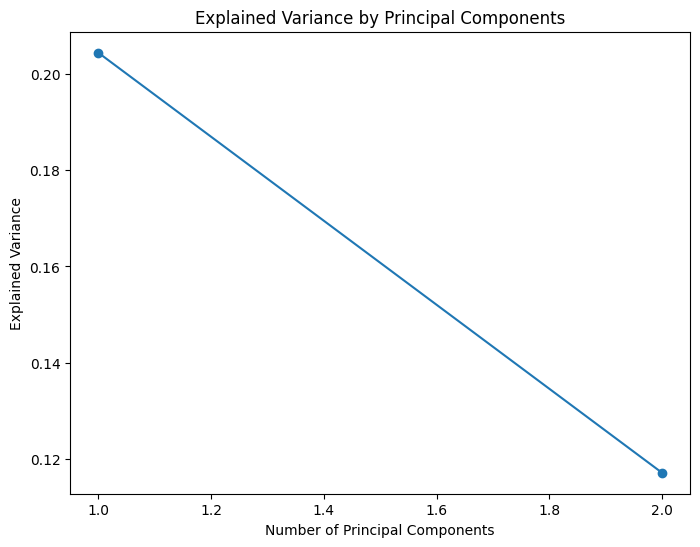

In [118]:
# Visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [119]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df1)

In [120]:
#Step 3: Clustering

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_for_clustering = pca_df
# Determine the optimal number of clusters using the Elbow Method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_for_clustering)
    distortions.append(kmeans.inertia_)


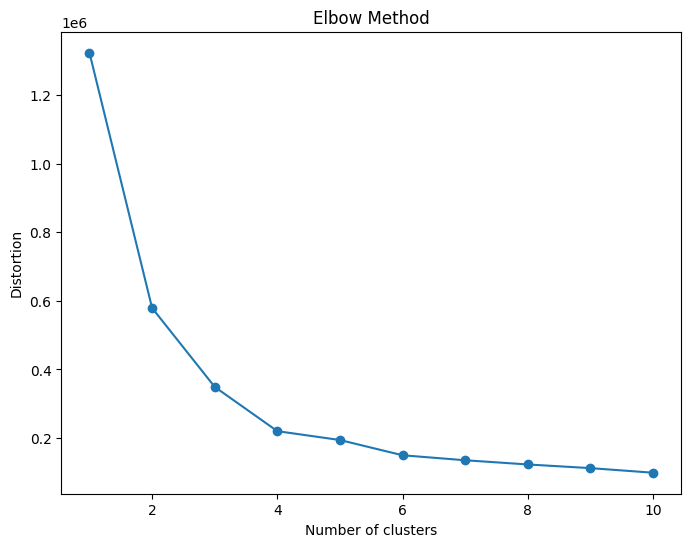

In [122]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [123]:
# Apply K-means with the chosen number of clusters
optimal_clusters = 4  # Example: Choose based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(data_for_clustering)
df1['Cluster'] = kmeans.labels_

In [124]:
#Step 4 Cluster Analysis

In [125]:
# Add cluster labels to the original data
df1['Cluster'] = kmeans.labels_

# Group data by clusters and calculate mean values for each feature
cluster_summary = df1.groupby('Cluster').mean()

print(cluster_summary)

             type         price     timestamp    posted_date  \
Cluster                                                        
0        0.005764  1.828713e+06  52960.918487   61509.125464   
1        0.000000  2.625211e+06  56607.498444   81598.526110   
2        0.008747  1.751593e+06  55502.138303  185956.008708   
3        0.000022  2.329592e+06  57708.680926  189518.920552   

         deactivation_date  category  parent_category    location  geo_region  \
Cluster                                                                         
0             72321.790419  6.171008              0.0  104.093161    5.705120   
1             57564.979916  3.245678              0.0  109.742055    1.876226   
2            193424.496729  6.028783              0.0  104.081911    5.752513   
3            189372.408852  3.474641              0.0  107.073684    1.992866   

             area  is_delivery_free  is_doorstep_delivery  is_dsd_applicable  \
Cluster                                         

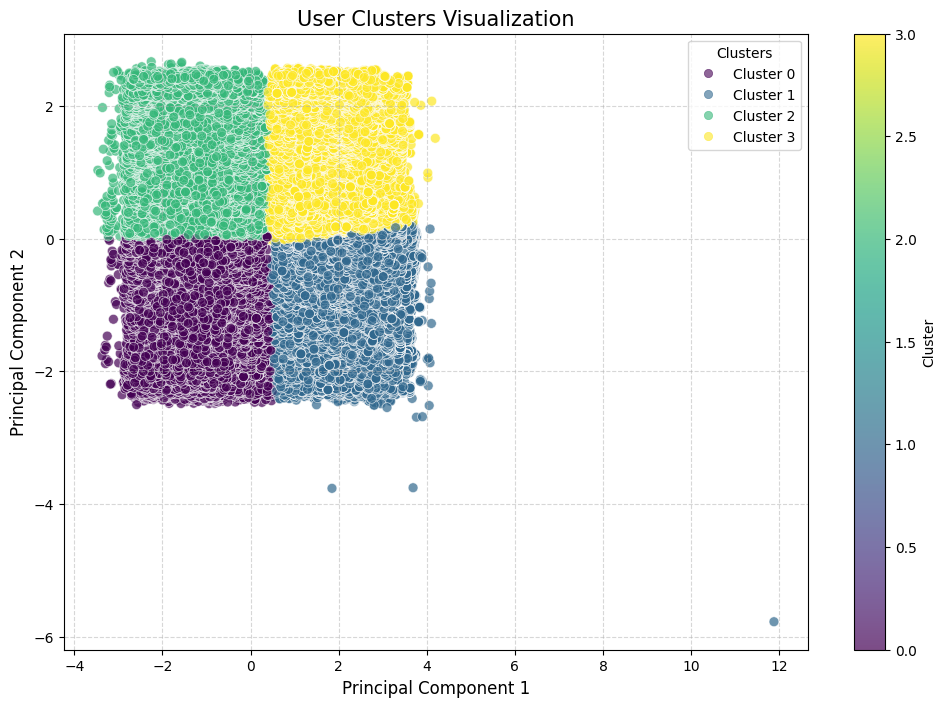

In [126]:
# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_for_clustering['PC1'], data_for_clustering['PC2'], c=df1['Cluster'], cmap='viridis', s=50, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('User Clusters Visualization', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend with cluster numbers
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend = plt.legend(handles, [f'Cluster {i}' for i in range(optimal_clusters)], title="Clusters", loc="best")

plt.show()


In [127]:

#Section 3: Geographical Analysis of Demand and Supply

In [128]:
#importing the dataset
df = pd.read_csv(r"C:\Users\ranu1\Downloads\vehicles.csv")

In [129]:
#finding null values in the dataset
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [130]:
#selecting only those advertisements that are related to vehicles
df['category'].unique()

array(['Auto Parts & Accessories', 'Cars', 'Auto Services', 'Rentals',
       'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [131]:
cols = ['Cars','Vans','Lorries & Trucks','Three Wheelers','Motorbikes','Buses','Heavy Duty','Tractors','Bicycles', 'Boats & Water Transport']

In [132]:
df = df[df['category'].isin(cols)]

In [133]:
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
31,Ssang Yong Rexton Ultimate d/ca 2019 in Nugeg...,"SSANGYONG REXTON D/cab,Aussie import,Model-Ult...",0 km,ssang-yong-rexton-ultimate-d-ca-2019-for-sale-...,Ssang Yong Rexton Ultimate d/ca 2019,for_sale,"Rs 22,000,000",25 Nov 2:29 pm,2022-11-25T14:29:55+05:30,2022-07-24T06:01:26.000Z,...,False,False,True,False,False,True,plus,July 2020,"{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Tr...",f5d27a3e26a293ffaacde64ecda5f5eb2e51fc212189d2...
1349,Toyota CHR 2017 in Kohuwala | ikman,GT\nUnregisterd\nVehicle can be seen at Dmmika...,"9,000 km",toyota-chr-2017-for-sale-colombo-498,Toyota CHR 2017,for_sale,"Rs 14,500,000",12 Jan 9:26 am,2023-01-12T09:26:22+05:30,2022-04-12T06:41:36.000Z,...,False,False,True,False,False,True,premium,December 2015,"{'Brand': 'Toyota', 'Model': 'CHR', 'Year of M...",a5cd12de59a8e3e14f4772ed7fa370f4b6850e0be24425...
1701,Toyota Axio 2015 in Kohuwala | ikman,"Unregistered \nAc/Ps/Pm, we also 2016 silver \...","24,000 km",toyota-axio-2015-for-sale-colombo-1533,Toyota Axio 2015,for_sale,"Rs 10,500,000",12 Jan 9:26 am,2023-01-12T09:26:29+05:30,2022-04-16T06:04:50.000Z,...,False,False,True,False,False,True,premium,December 2015,"{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / E...",a5cd12de59a8e3e14f4772ed7fa370f4b6850e0be24425...
1702,Daihatsu Atrai Wagon Turbo 2016 in Kohuwala |...,Unregistered \nPM/PS\n5 Door\nwe also Hijet An...,"55,000 km",daihatsu-atrai-wagon-turbo-2016-for-sale-colom...,Daihatsu Atrai Wagon Turbo 2016,for_sale,"Rs 6,500,000",09 Nov 2:33 pm,2022-11-09T14:33:53+05:30,2022-04-16T05:46:11.000Z,...,False,False,True,False,False,True,plus,December 2015,"{'Brand': 'Daihatsu', 'Model': 'Atrai Wagon', ...",a5cd12de59a8e3e14f4772ed7fa370f4b6850e0be24425...
1917,Mercedes Benz C180 2010 in Colombo 14 | ikman,Parking sensors\nMirror package\nSemi electric...,"137,000 km",mercedes-benz-c180-2010-for-sale-colombo-217,Mercedes Benz C180 2010,for_sale,"Rs 11,500,000",14 Dec 4:17 pm,2022-12-14T16:17:03+05:30,2022-08-19T02:41:37.000Z,...,False,False,True,False,False,True,plus,April 2018,"{'Brand': 'Mercedes Benz', 'Model': 'C180', 'Y...",5e2c4aef554936c221a6318bbc86e9db5b39da13b4d1c9...


In [134]:
#name of the columns in the dataset
df.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [135]:
#selecting columns related to geography or time
df = df[['title','posted_date','category','area']]

In [136]:
#data types of different columns in the dataset
df.dtypes

title          object
posted_date    object
category       object
area           object
dtype: object

In [137]:
df.head()

,title,posted_date,category,area
31,Ssang Yong Rexton Ultimate d/ca 2019,2022-11-25T14:29:55+05:30,Cars,"{'id': 1506, 'name': 'Colombo'}"
1349,Toyota CHR 2017,2023-01-12T09:26:22+05:30,Cars,"{'id': 1506, 'name': 'Colombo'}"
1701,Toyota Axio 2015,2023-01-12T09:26:29+05:30,Cars,"{'id': 1506, 'name': 'Colombo'}"
1702,Daihatsu Atrai Wagon Turbo 2016,2022-11-09T14:33:53+05:30,Cars,"{'id': 1506, 'name': 'Colombo'}"
1917,Mercedes Benz C180 2010,2022-12-14T16:17:03+05:30,Cars,"{'id': 1506, 'name': 'Colombo'}"


In [138]:
#splitting the area column into location
import ast
dict_df = df['area'].apply(pd.Series)

In [139]:
name = []
for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])
    name.append(dict_converted['name'])

df['name']=name

In [140]:
df = df.drop('area',axis=1)

In [141]:
import matplotlib.pyplot as plt

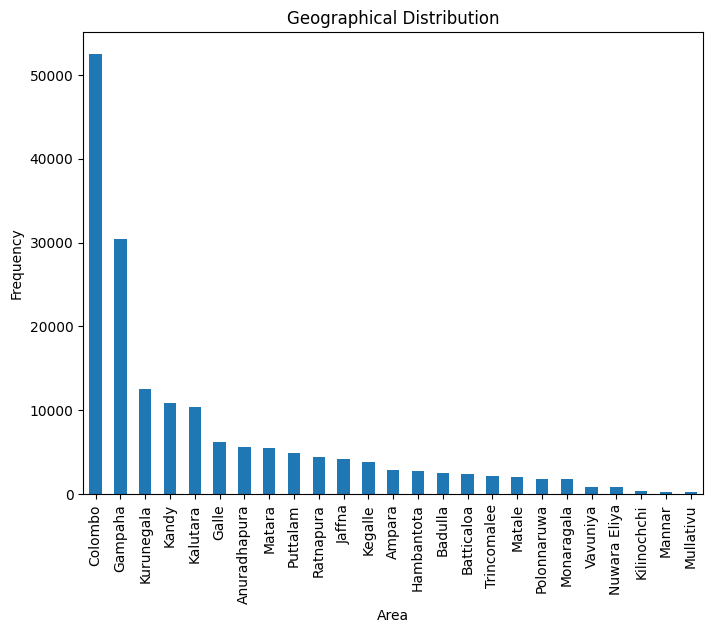

In [142]:
#Visualize the distribution of advertisements across different regions.
category_counts = df['name'].value_counts()
category_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Geographical Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [143]:
#Identify regions with high demand and supply

In [144]:
top_categories = category_counts.head(5)

In [145]:
other_count = category_counts.sum() - top_categories.sum()
top_categories['Others'] = other_count

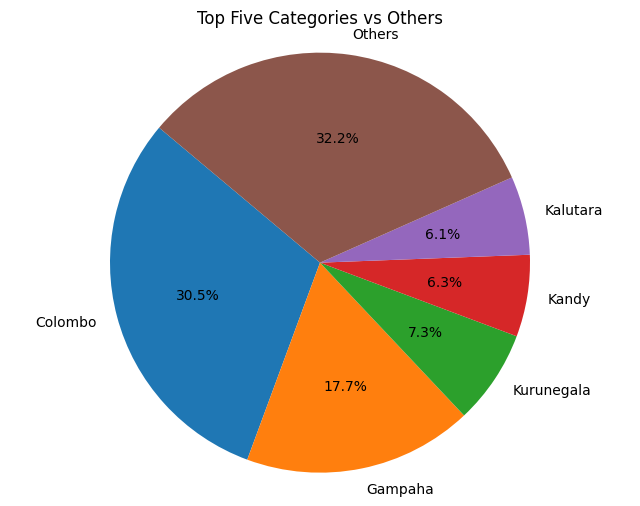

In [146]:
plt.figure(figsize=(8, 6))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Five Categories vs Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [147]:
#most of the advertisements comes from two cities in Sri Lanka that is colombo and Gampha as shown in the pie chart.
#they have a total of 58.2% share of the total advertisements.

#rest all the cities dont have much advertisements from their region as compared to the top two cities.
#all the other cities have a share of 41.8% of the total advertisements.

In [148]:
#Temporal Analysis

In [149]:
#Analyze how demand and supply vary over time in different regions

In [150]:
#converting the posted date into a suitable format
df['posted_date'] = pd.to_datetime(df['posted_date'])

In [151]:
df['date'] = df['posted_date'].dt.date

In [152]:
#preparing data for region wise visualization
df_colombo = df[df['name']=='Colombo']

In [153]:
category_counts = df_colombo['date'].value_counts()

In [154]:
category_counts = category_counts.sort_index()

In [155]:
category_counts

date
2022-09-06      2
2022-09-09      1
2022-09-14      1
2022-09-16      2
2022-09-19      2
             ... 
2023-03-29     25
2023-03-30     13
2023-03-31     18
2023-04-01    291
2023-04-02     17
Name: count, Length: 184, dtype: int64

Text(0, 0.5, 'Frequency')

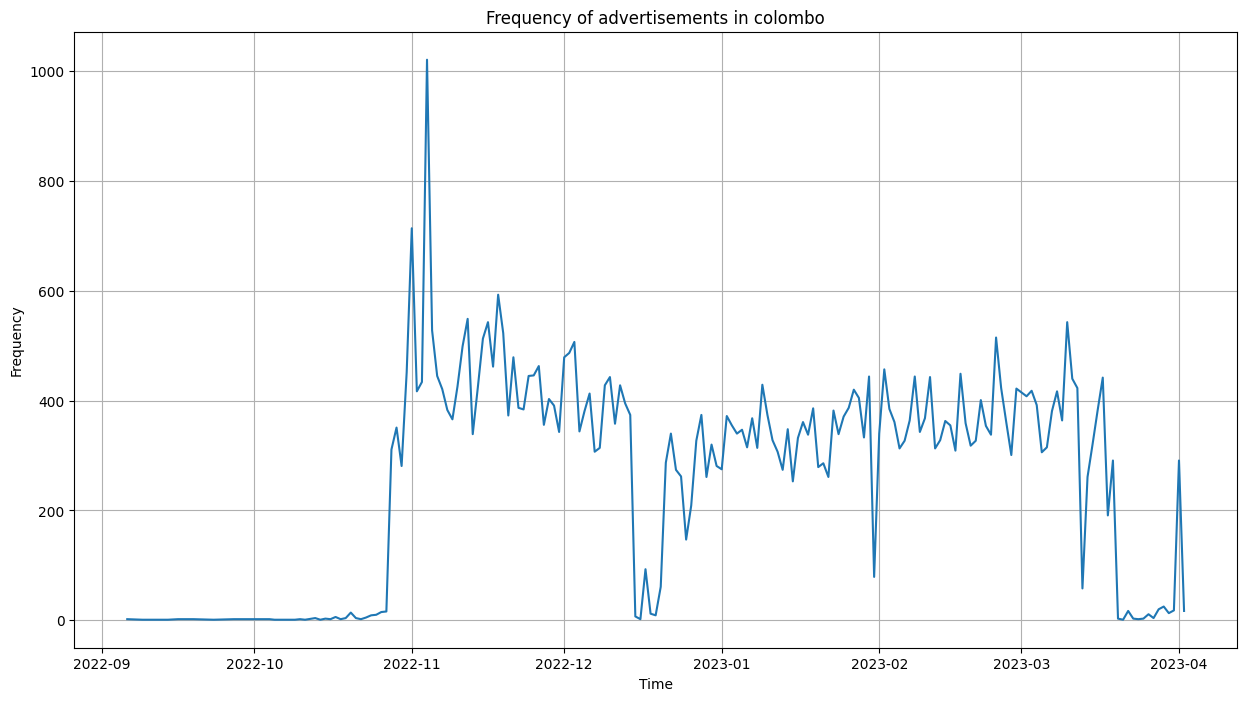

In [156]:
plt.figure(figsize=(15,8))
category_counts.plot()
plt.grid()
plt.title("Frequency of advertisements in colombo")
plt.xlabel("Time")
plt.ylabel("Frequency")

In [157]:
#preparing data for region wise visualization
df_gampaha = df[df['name']=='Gampaha']

In [158]:
category_counts1 = df_gampaha['date'].value_counts()

In [159]:
category_counts1 = category_counts1.sort_index()

Text(0, 0.5, 'Frequency')

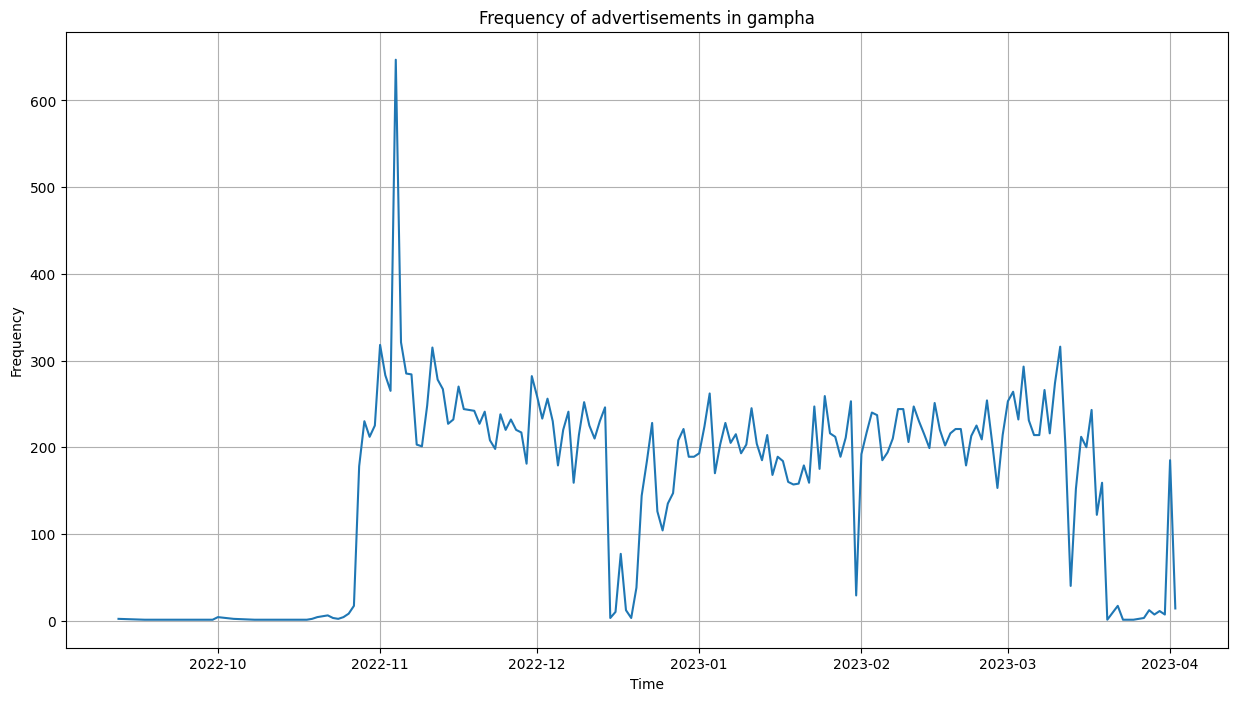

In [160]:
plt.figure(figsize=(15,8))
category_counts1.plot()
plt.grid()
plt.title("Frequency of advertisements in gampha")
plt.xlabel("Time")
plt.ylabel("Frequency")

In [161]:
#Identify any seasonal trends or patterns.

In [162]:
category_counts2 = df['date'].value_counts()

In [163]:
category_counts2 = category_counts2.sort_index()

Text(0, 0.5, 'Frequency')

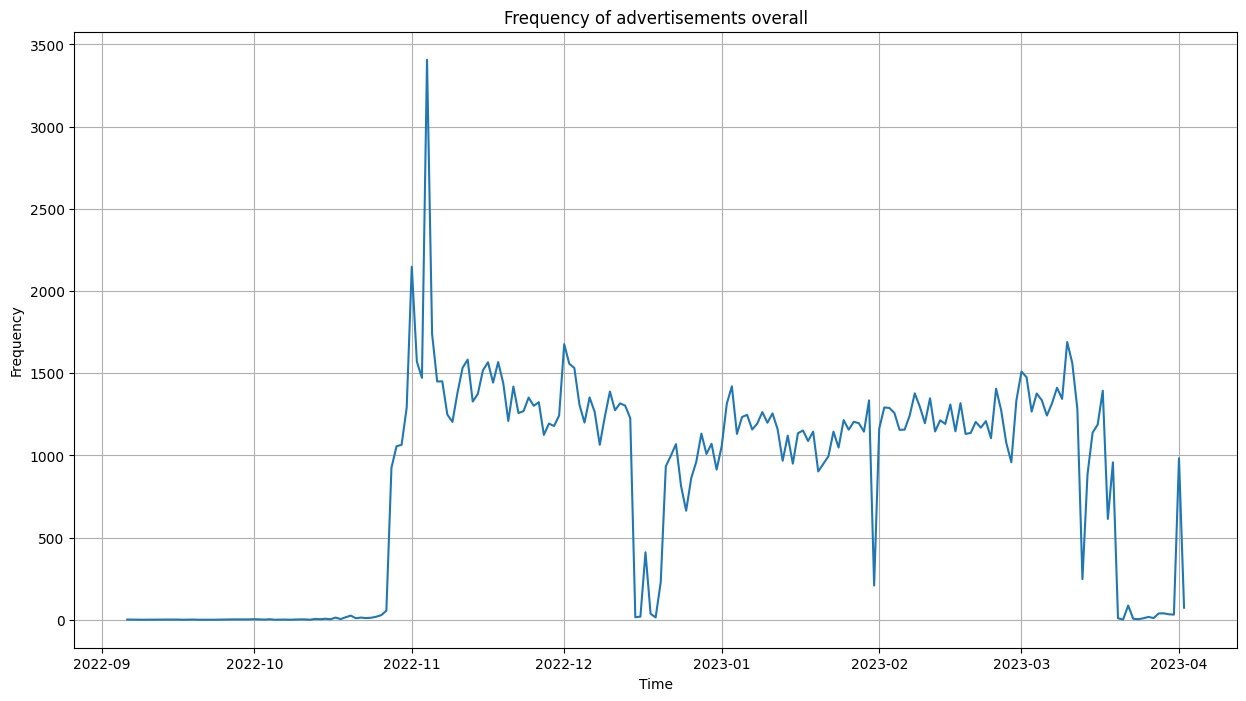

In [164]:
plt.figure(figsize=(15,8))
category_counts2.plot()
plt.grid()
plt.title("Frequency of advertisements overall")
plt.xlabel("Time")
plt.ylabel("Frequency")

In [165]:
# the above visualization shows that there is a dip in advertisement after every two months,
#first in october, then in december, then in february and then in april

In [166]:
#Model

In [167]:
#importing the dataset
df = pd.read_csv(r"C:\Users\ranu1\Downloads\vehicles.csv")

In [168]:
#choosing the columns that are required for the model
df=df[['area','posted_date','price']]

In [169]:
dict_df = df['area'].apply(pd.Series)

In [170]:
name = []
for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])
    name.append(dict_converted['name'])

df['name']=name

In [171]:
df = df.drop('area',axis=1)

In [172]:
df['posted_date'] = pd.to_datetime(df['posted_date'])

In [173]:
df['month'] = df['posted_date'].dt.month

In [174]:
df = df.drop('posted_date',axis=1)

In [175]:
df['price'] = df['price'].astype(str)
df['price'] = df['price'].apply(lambda x: x.replace('Rs ',''))
df['price'] = df['price'].apply(lambda x: x.replace(',',''))
df['price'] = pd.to_numeric(df['price'],errors='coerce')

In [176]:
df.isnull().sum()

price    5484
name        0
month       6
dtype: int64

In [177]:
#dropping null values from the price and month column
df = df.dropna(subset=['price'])
df = df.dropna(subset=['month'])

In [178]:
df.dtypes

price    float64
name      object
month    float64
dtype: object

In [179]:
#encoding the region names in the dataset using label encoder
from sklearn.preprocessing import LabelEncoder

In [180]:
label_encoder = LabelEncoder()

In [181]:
df['name'] = label_encoder.fit_transform(df['name'])

In [182]:
#making the model for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [183]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [184]:
#splitting the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [185]:
#the linear regression model
model = LinearRegression()

In [186]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [187]:
#evaluation metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [188]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 49959797292412.13
R-squared: 0.004164505292644005


In [189]:
#insights
#there is a dip in advertisements in every two months
#gampha and colombo contributes most to the number of advertisements.

In [190]:
#recommendations
#keep a bi-monthly sale in posting advertisements so that the dip in advertisements is less